# HW03 : Optimization theory and gradient descent (for Uni- and bi-variate functions)


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

## Question 1

Implement  a solver for  minimization problems by yourself. 

The function find_root should have following parameters:<br>
Parameters: <br>
        df (func) : first derivative function<br>
        eta (float) : learning rate<br>
        max_iter (int) : maximum number of iterations<br>
        tol (float) : tolerance<br>
        root (float) : initial guess for root of the gradient function<br>




The function should return :<br>    
    Returns:<br>
        root (float) : root of function<br>
        num_iters (int) : the number of iterations<br>

**Please document your code with docstrings and comments. Please make sure your response here uses the preformatted style. **

```
# Notice how the code is in preformatted style
the def test_func():
""" This is a doc string"""
   pass
```

In [36]:
def find_root(df, eta, max_iter, tol, root):
    """
    This function will return the root and number of gradient descent iterations to solve f(x)
    
    Parameters:
        df (func) : first derivative function
        eta (float) : learning rate
        max_iter (int) : maximum number of iterations
        tol (float) : tolerance
        root (float) : initial guess for root of the gradient function
        
    Returns:
        root (float) : root of function
        i (int) : the number of iterations
    """
    
    # initialize delta
    delta = float('inf')
    
    i = 0
    while delta > tol and i < max_iter:
        #==================================================#
        #               Place your code between here       #
        x = root
        root = ...
        delta = abs(...)
        i+=1
        #==================================================#
        
    return root, i

In [37]:
### Here is the answer for Q 1. Please go through the code to understand the find_root function.
def find_root(df, eta, max_iter, tol, root):
    """
    This function will return the root and number of gradient descent iterations to solve f(x)
    
    Parameters:
        df (func) : first derivative function
        eta (float) : learning rate
        max_iter (int) : maximum number of iterations
        tol (float) : tolerance
        root (float) : initial guess for root of the gradient function
        
    Returns:
        root (float) : root of function
        num_iters (int) : the number of iterations
    """
    
    delta = float('inf')
    
    i = 0
    while delta > tol and i < max_iter:

        new_root = root
        root = new_root - eta * df(new_root)
        delta = abs(new_root - root)
        i+=1
        
    return root, i
    

## Question 2

Using the code you wrote in Question 7, if $f(x) = x^2$, given $x$ in the domain of [-2, 2], find argmin $f(x)$ . Sometimes this is written as find x such that it  minimizes $f(x)$. Here use gradient descent along with a learning rate of   0.1 and a starting guess for the root of the gradient function of 1.5.   Report the minimum that you attain  via your homegrown gradient descent 
<select name="question 7.1" id="q7.1">
    <option value="[Select]" selected>[Select]</option>
    <option value="-0.000005">-0.000005</option>
    <option value="0.0">0.0</option>
    <option value="0.000005">0.000005</option>
    <option value="0.00003" >0.00003</option>
</select>
 when run for  100 iterations (if required) when the tolerance for convergence is 1e-5.  How many gradient descent iterations did you take? 
<select name="question 7.2" id="q7.2">
    <option value="[Select]" selected>[Select]</option>
    <option value="1">1</option>
    <option value="9">9</option>
    <option value="100">100</option>
    <option value="48" >48</option>
</select>
 . 

In [38]:
# Derivative function
def df(x):
    #==================================================#
    #               Place your code between here       #
    return 2*x
    #==================================================#

root, num_iters = find_root(df, eta=0.1, max_iter=100, tol=1e-5, root=1.5)
print(format(np.round(root,5), '.05f'), num_iters)

0.00003 48


In [39]:
# This is the answer for Question 2
def df(x):
    #==================================================#
    #               Place your code between here       #
    return 2 * x
    #==================================================#

root, num_iters = find_root(df, eta=0.1, max_iter=100, tol=1e-5, root=1.5)
print(format(np.round(root,5), '.05f'), num_iters)

0.00003 48


## Question 3

Similarily using the code from lab where convergence is defined as the difference of the derivative of the root to zero, if $f(x) = x^2$, given $x$ in the domain of [-2, 2], find argmin $f(x)$ . Sometimes this is written as find x such that it  minimizes $f(x)$. Here use gradient descent along with a learning rate of   0.1 and a starting guess for the root of the gradient function of 1.5.   Report the minimum that you attain  via your homegrown gradient descent 
<select name="question 7.1" id="q7.1">
    <option value="[Select]" selected>[Select]</option>
    <option value="-0.000005">-0.000005</option>
    <option value="0.0">0.0</option>
    <option value="0.000005">0.000005</option>
    <option value="0.00003" >0.000004</option>
</select>
 when run for  100 iterations (if required) when the tolerance for convergence is 1e-5.  How many gradient descent iterations did you take? 
<select name="question 7.2" id="q7.2">
    <option value="[Select]" selected>[Select]</option>
    <option value="1">1</option>
    <option value="9">9</option>
    <option value="100">100</option>
    <option value="48" >57</option>
</select>
 . 

In [49]:
#Terminating criteria is df(x) == 0, i.e., is x a root of f(x)
def terminating_criteria(df, x):
    """examine x for progress; 
     if root estimate is good then df(x) should be close to ZERO
     """
    return abs(0-df(x))

def gradient_descent(df, d2f, x0, tol=0.001, alpha = .5, 
                    print_res=False, track_every_n_steps=10, num_of_iters=1000):
    """Find the root of the provide gradient function via 
       gradient descent algorithm
    
    Args:
        df  (func): The gradient function for which we want its roots x i.e., f(x) ==0.
        d2f (func): not used in gradient descent: why? (hint: we use alpha the learning rate instead)
        x0  (double): initial root guess for the gradient function df
        tol (double): tolerance for when we stop searching; we would like df(x) == 0 within a tolerance
        eta (double): the learning rate or step size; sometimes called alpha
        print (bool): print a trace or not of the different root estimates that we explored
        num_of_iters: how many iterations should the gradient descent algorithm run for

    Returns:
        (x0, approximations): root and the root approximations

    """
    root_estimates = [x0]  #track the root estimates
    gradients=[]  #track the gradients at each iteration of GD
    i=0
    while terminating_criteria(df, x0) > tol and i < num_of_iters:
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit
        if (i%track_every_n_steps==0): gradients.append(df(x0)) #track every n gradients
        #print(f"x0 = x0 - alpha * df(x0) {(x0 - alpha * df(x0)):7.3f} = {x0:7.3f} - {alpha:7.5f} * {df(x0):7.3f}")
        x0 = x0 - alpha * df(x0)   # Gradient step
        if (i%track_every_n_steps==0): root_estimates.append(x0); gradients.append(df(x0)) #track every n estimates
        i+=1
    if print_res: print ('Root is at: ', x0); print ('df(x) at root is: ', df(x0))
    return (x0, root_estimates, gradients, i)

In [50]:
def df(x):
    #==================================================#
    #               Place your code between here       #
    return 2*x
    #==================================================#

def d2f(x):
    #==================================================#
    #               Place your code between here       #
    return 2
    #==================================================#

root_homegrown, trace, gradients, iter_cnt = gradient_descent(df, d2f, 1.5,
                                                                tol=1e-5, alpha=0.1, track_every_n_steps=1)

print(format(np.round(root_homegrown, 6), '.06f'), iter_cnt)

0.000004 57


## Question 4

If $f(x) = 5x^2 +7x$, given x in the domain of [-3, 3], find argmin $f(x)$ . Sometimes this is written as find x such that it  minimizes $f(x)$. Here use a learning rate of 0.1 and use a starting guess for the root of gradient function of  10.77.   Report the minimum that you attain  via your homegrown gradient descent 
<select name="question 9.1" id="q9.1">
    <option value="[Select]" selected>[Select]</option>
    <option value="-0.7" >-0.7</option>
    <option value="0.7">0.7</option>
    <option value="-1.4">-1.4</option>
    <option value="1.4">1.4</option>
</select>
 when run for  100 iterations (if required) when the tolerance for convergence is 1e-5.  How many gradient descent iterations did you take? 
<select name="question 9.1" id="q9.1">
    <option value="[Select]" selected>[Select]</option>
    <option value="2" >2</option>
    <option value="28">28</option>
    <option value="100">100</option>
    <option value="Correct Solution not provided">Correct Solution not provided</option>
</select>
 . 
 
**Please use your own homegrown function you created in question 7**

In [51]:
def df(x):
    #==================================================#
    #               Place your code between here       #
    return 10*x + 7
    #==================================================#
    
root, num_iters = find_root(df, eta=0.1, max_iter=100, tol=1e-5, root=10.77)
print(root, num_iters)

-0.7 2


## Question 5

If $f(x) = 2x^2 +4x$, given x{-3, 3}, find argmin $f(x)$ . Sometimes this is written as find x such that it  minimizes $f(x)$. Here use gradient descent along with a learning rate of 0.5, and a starting guess for the root of gradient function of  2.7.   Report the minimum that you attain  via your homegrown gradient descent 
<select name="question 10.1" id="q10.1">
    <option value="[Select]" selected>[Select]</option>
    <option value="1">-1</option>
    <option value="28">-0.999998</option>
    <option value="100">2.7</option>
    <option value="None of these answers are correct">None of these answers are correct.</option>
</select>
 when run for  10 iterations (if required) when the tolerance for convergence is 1e-5.  Gradient  descent will converge  on a good root after how many iterations?  
<select name="question 10.2" id="q10.2">
    <option value="[Select]" selected>[Select]</option>
    <option value="1">1 iteration of gradient descent</option>
    <option value="28">100 or so iterations of gradient descent</option>
    <option value="1000">Gradient descent will never converge under this setting. If the learning is changed to a smaller value, it may converge.</option>
    <option value="100 or so iterations of gradient descent">1000 or so iterations of gradient descent</option>
</select>


In [62]:
def df(x):
    #==================================================#
    #               Place your code between here       #
    return 4*x + 4
    #==================================================#

root, num_iters = find_root(df, eta=0.5, max_iter=10, tol=1e-5, root=2.7)
print(root, num_iters)

2.7 10


## Question 6

If $f(x) = 4x^3 + 9x^2 + 2x-1$ (a univariate function), given x in the domain of [-3, 3], find argmin f(x) . Sometimes this is written as find x such that it  minimizes f(x). Here use gradient descent along with a learning rate of  0.01, and use a starting guess for the root of gradient function of  1.5.   Report the minimum up to three decimal places that you attain  via your homegrown gradient descent  when run for  100 iterations (if required) when the tolerance for convergence is 1e-5.

In [54]:
def df(x):
    #==================================================#
    #               Place your code between here       #
    return 12*x**2 + 18*x + 2
    #==================================================#

root, num_iters = find_root(df, eta=0.01, max_iter=100, tol=1e-5, root=1.5)
np.round(root,3)

-0.121

## Question 7

Implement  a solver for  multivariate minimization problems by yourself. And show it in action for  the following:

If $f(x) = (x_2 - x_1)^4 + 8x_1x_2 - x_1 + x_2 + 3$, given Xs in the domain of [-3, 3], find argmin $f(X)$ . Sometimes this is written as find X such that it  minimizes f(X). Here use gradient descent along with a learning rate of 0.01 and a starting guess for the root of gradient function of:  initial_root_guess = [-0.9, -0.9].   Report the value of the objective function value at the optimal setting (i.e., the minimum) for this problem  up to three decimal places that you attain  via your homegrown gradient descent  when run for  1000 iterations (if required) when the tolerance for convergence is 1e-3. Please document your code with docstrings and comments.

**Please make sure your response here uses the preformatted style. You will get ZERO points for this question if the code is not formatted correctly, and if it is a copy of the lab notebook code.**

```
# Notice how the code is in preformatted style
the def test_func():
""" This is a doc string"""
   pass
```

In [55]:
import sympy as sym
def get_mgd(func, theta, eta, max_iter, tol):
    """
    This function will return the root and number of gradient descent iterations to solve f(x)
    
    Parameters:
        func (sympy.core.add) : objective function f(x)
        theta (list) : initial guess for gradient
        eta (float) : learning rate
        max_iter (int) : maximum number of iterations
        tol (float) : tolerance
        
    Returns:
        root (float) : root of function
        theta (np.array) : gradient
    """
    

#==========================================================#
    #               Place your code between here       #
    dfx1 = sym.diff((x2-x1)**4 + 8*x1*x2 - x1 + x2 + 3,x1)  # derivative with respect to x1
    dfx2 = sym.diff((x2-x1)**4 + 8*x1*x2 - x1 + x2 + 3,x2)  # derivative with respect to x2
    # HINT: Use sympy differentiation method. 
    #       Please refer Lab notebook detailed introduction 
    #       and examples of sympy in action
    #       or you can refer following link-
    #       https://docs.sympy.org/latest/tutorial/calculus.html
    #==========================================================#


    grad = [dfx1, dfx2]  # gradient
    
    # initialize
    new_theta = np.zeros(len(theta),)
    delta = np.array([float('inf'), float('inf')])
    i=0

    while max(delta) > tol and i < max_iter:
        for j in range(len(grad)):
            #==================================================#
            #               Place your code between here       #
            new_theta[j] = theta[j] - eta * N(grad[j].subs([(x1, theta[0]), (x2, theta[1])]))
            #==================================================#
        i+=1
        delta = abs(new_theta - theta)
        theta = new_theta.copy()
        
    return float(N(func.subs(([(x1, theta[0]), (x2, theta[1])])))), theta

## Question 8


If $f(x) = (x_2 - x_1)^4 + 8x_1x_2 - x_1 + x_2 + 3$, given Xs in the domain of [-3, 3], find argmin $f(X)$ . Sometimes this is written as find X such that it  minimizes $f(X)$. Here use gradient descent along with a learning rate of 0.01 and a starting guess for the root of gradient function of:  initial_root_guess = [-0.9, -0.9].   All you need to do in this question is to run the following code cell and report the value of the objective function value at the optimal setting (i.e., the minimum) for this problem  up to three decimal places that you attain  via your homegrown gradient descent  when run for  1000 iterations (if required) when the tolerance for convergence is 1e-3. 

In [56]:
x1 = Symbol('x1')
x2 = Symbol('x2')

#==================================================#
#               Place your code between here       #
# objective function
f = (x2 - x1)**4 + 8*x1*x2 - x1 + x2 + 3

root, gradient = get_mgd(func=f, theta=[-0.9, -0.9], eta=0.01, max_iter=1000, tol=1e-3)
#==================================================#

np.round(root,3)

0.945

## Question 9

Upload a 3D surface plot (in JPG format)  of your multivariate optimization solution (corresponding to a bivariate problem in this case), showing the trace of the different candidate roots that were explored via gradient descent. Please use the following problem for this challenge and dont forget to report your solution on the graph:

If $f(x) = (x_2 - x_1)^4 + 8x_1x_2 - x_1 + x_2 + 3$, given Xs in the domain of [-3, 3],  find argmin $f(X)$ . Sometimes this is written as find X such that it  minimizes f(X). Here use gradient descent along with a learning rate of 0.1 and a starting guess for the root of gradient function of:  initial_root_guess = [-0.9, -0.9].  On the plot report the following:

 The value of the objective function value at the optimal setting (i.e., the minimum) for this problem  up to three decimal places that you attain  via your homegrown gradient descent  when run for  1000 iterations (if required) when the tolerance for convergence is 1e-3. 
The optimal solution attained, i.e., x1 = ??, x2 =???]
Do forget to label axis, and good plot title
Feel free to add other useful information as needed

In [23]:
x1 = Symbol('x1')
x2 = Symbol('x2')

# objective function
f = (x2 - x1)**4 + 8*x1*x2 - x1 + x2 + 3

get_mgd(func=f, theta=[-0.9, -0.9], eta=0.01, max_iter=1000, tol=1e-3)

(3.1026627932111577, array([0.13604195, 0.11430372]))

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

class multivariate_GD(object):

    def __init__(self,func, gradient, hessian, start_point,step_size=0.8,num_iter=100,tol=0.000001):
        '''
        func: function to be optimized. Takes a vector argument as input and returns
              a scalar output
        step_size: step size in newton method update step
        num_iter: number of iterations for gradient descent to run
        tol: tolerance to determine convergence
        '''
        self.func=func
        self.gradient = gradient
        self.hessian = hessian
        self.start_point=np.array(start_point)
        self.num_iter=num_iter
        self.step_size=step_size
        self.tol=tol
        self.approach=[]

    def rootFinder(self):
        '''
        perform multivariate newton method for function with vector input
        and scalar output
        '''
        x_t=self.start_point
        self.approach.append(x_t)

        for i in range(self.num_iter):
            x_tplus1 = x_t - self.step_size * np.array(gradient(x_t))
            #print(x_tplus1)
            # check for convergence
            if abs(max(x_tplus1-x_t)) < self.tol:
                break
            x_t = x_tplus1
            self.approach.append(x_t)
        #else:   #report lack of  convergence  
        #    raise SolutionNotFound, "No convergence after %d iterations" % (self.num_iter)

        self.crit_point = x_tplus1
        self.max_min = self.func(x_t)

        return (self.crit_point, self.max_min)

    def critical_point(self):
        '''
        print critical point found in newton_method function. newton_method function
        must be called first.
        '''
        print (self.crit_point)
        

    def plot(self):
        samples = 100
        x0 = np.linspace(-1.0, 1.0, samples)
        x1 = np.linspace(-1.0, 1.0, samples)
        x0, x1 = np.meshgrid(x0, x1)
        D = np.empty((samples**2, samples**2))
        D[0] = np.reshape(x0, samples**2)
        D[1] = np.reshape(x1, samples**2)
        Z = self.func(D)
        Z = np.reshape(Z, (samples, samples))

        fig = plt.figure(figsize=(14,10))
        # ax = fig.add_subplot(111, projection='3d')
        ax = Axes3D(fig, auto_add_to_figure=False)
        fig.add_axes(ax)
        
        # plot the approach
        T = np.transpose(self.approach)
        TZ = self.func(T)
        ax.plot(T[0], T[1], TZ, alpha = 0.5, marker='o', c='k')
        # ax.scatter(T[0], T[1], np.zeros(T.shape[1]), marker='o', c='K')

        # Plot the surface.
        # surf = ax.plot_surface(x0, x1, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
        #                        alpha = 0.5, linewidth=0, antialiased=False)
        surf = ax.plot_surface(x0, x1, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                               alpha = 0.5, linewidth=0, antialiased=False)

        # Customize the z axis.
        ax.set_zlim(0., 15.)
        #ax.zaxis.set_major_locator(LinearLocator(6))
        #ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

        # rotation of the graph
        ax.azim = 25
        ax.elev = 10

        # Add a color bar which maps values to colors.
        fig.colorbar(surf, shrink=0.5, aspect=10)

        plt.title("Bivariate Gradient Descent")
        plt.axis((-1, 1, -1, 1))
        plt.xlabel("x1 Value")
        plt.ylabel("x2 Value")
        plt.show()
        
        # Contour plot of loss in parameter space
        plt.figure(figsize=(8, 8))
        cx = plt.subplot(1, 1, 1, facecolor='Silver')
        plt.grid(b=True, which='major', color='w', linestyle='-')
        plt.axis((-1, 1, -1, 1))
        plt.scatter(T[0], T[1], marker = 'o', c = 'k')
        plt.contour(x0, x1, Z, 
                    levels=np.logspace(0.01, 2.0, 20),
                    cmap = 'rainbow', linewidths = 2.0, alpha=0.65)
        plt.title("Bivariate Gradient Descent Countour")
        plt.xlabel("x1 Value")
        plt.ylabel("x2 Value")
        plt.show()
        
        return
    
if __name__ == '__main__':
    # run test
    
    #This following function 
    #     F(x) = F(x1, x2) = (x2 - x1)^4 +8x1x2 - x1 + x2 + 3
    # has the stationary points: 
    #    x1=[-0.42 0.42]T,   x2=[-0.13 0.13]T, and  x3=[0.55 -0.55]T
#==================================================#
#               Complete the following code       #
    def objectiveFunction(x):
        x1 = x[0]; x2 = x[1]
        return (x2 - x1)**4 + 8 + 8*x1*x2 - x1 + x2 + 3

    def gradient(x): #the gradient vector for which we want to find the zeros
        x1 = x[0]; x2 = x[1]
        return ([-4*(x2 - x1)**3 + 8*x2 - 1,
                4*(x2 - x1)**3 + 8*x1  + 1])
    def hessian(x):
        x1 = x[0]; x2 = x[1]
        return ([[12*(x2 - x1)**2, -12*(x2 - x1)**2 + 8], 
                 [-12*(x2 - x1)**2+8,  -12*(x2 - x1)**2]])

    #Find candidate optima for the objective function via f (aka fprime) using Newton-Raphson
    # xzeroGuess = [-0.2, .4]
    xzeroGuess = [-0.9, -0.9]

    mvGD = multivariate_GD(objectiveFunction, hessian, gradient, xzeroGuess, step_size=0.01,num_iter=100,tol= 1e-3)
    anOptimum = mvGD.rootFinder() #find an optimum
    print("a potential optimum is located at: ", anOptimum)
#==================================================#
    # local minima are   x1=[-0.42 0.42]T,   x2=[-0.13 0.13]T, and  x3=[0.55 -0.55]T

a potential optimum is located at:  (array([ 0.54262541, -0.56430382]), 8.944938051549352)


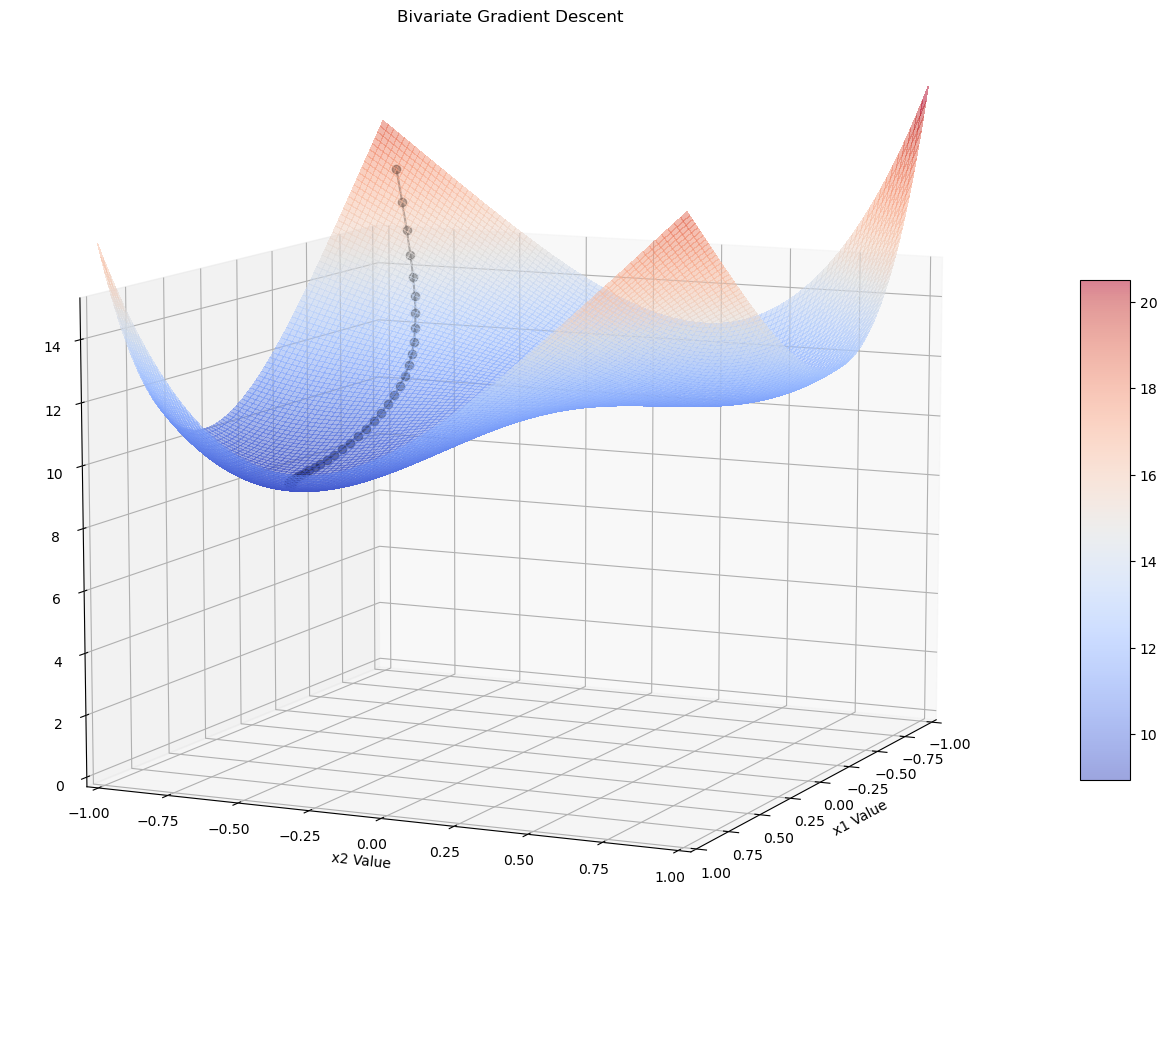

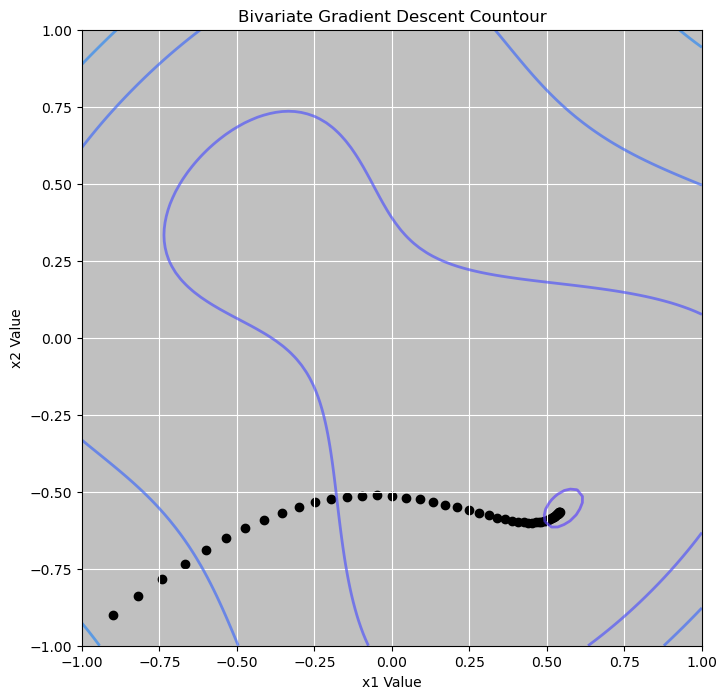

In [25]:
plot = mvGD.plot()

## Question 10

Upload a 3D surface plot (in JPG format)  of your multivariate optimization solution (corresponding to a bivariate problem in this case), showing the trace of the different candidate roots that were explored via gradient descent. Please use the following problem for this challenge and dont forget to report your solution on the graph:

If $f(x) = (5x_2 - 9x_1)^3 + 9x_1x_2 - x_1 + x_2 + 3$, given Xs in the domain of [-3, 3],  find argmin $f(X)$ . Sometimes this is written as find X such that it  minimizes f(X). Here use gradient descent along with a learning rate of 1e-5 and a starting guess for the root of gradient function of:  initial_root_guess = [-0.9, -0.9].  On the plot report the following:

 The value of the objective function value at the optimal setting (i.e., the minimum) for this problem  up to three decimal places that you attain  via your homegrown gradient descent  when run for  1000 iterations (if required) when the tolerance for convergence is 1e-3. 
The optimal solution attained, i.e., x1 = ??, x2 =???]
Do forget to label axis, and good plot title
Feel free to add other useful information as needed

In [26]:
#==================================================#
#               Complete the following code       #
def objectiveFunction(x):
    x1 = x[0]; x2 = x[1]
    return ((5*x2 - 9*x1)**3 + 9*x1*x2 - x1 + x2 + 3) 

def gradient(x): #the gradient vector for which we want to find the zeros
    x1 = x[0]; x2 = x[1]
    return ([-27*(5*x2 - 9*x1)**2 + 9*x2 - 1,
            15*(5*x2 - 9*x1)**2 + 9*x1 + 1])

def hessian(x):
    pass

xzeroGuess = [-0.9, -0.9]
mvGD = multivariate_GD(objectiveFunction,hessian, gradient, xzeroGuess, step_size=0.01,num_iter=1000,tol= 1e-3)
#==================================================#


anOptimum = mvGD.rootFinder() #find an optimum

print("a potential optimum is located at: ", anOptimum)

a potential optimum is located at:  (array([ inf, -inf]), -inf)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in subtract


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.7/site-packages/mpl_toolkits/mplot3d/proj3d.py:109: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


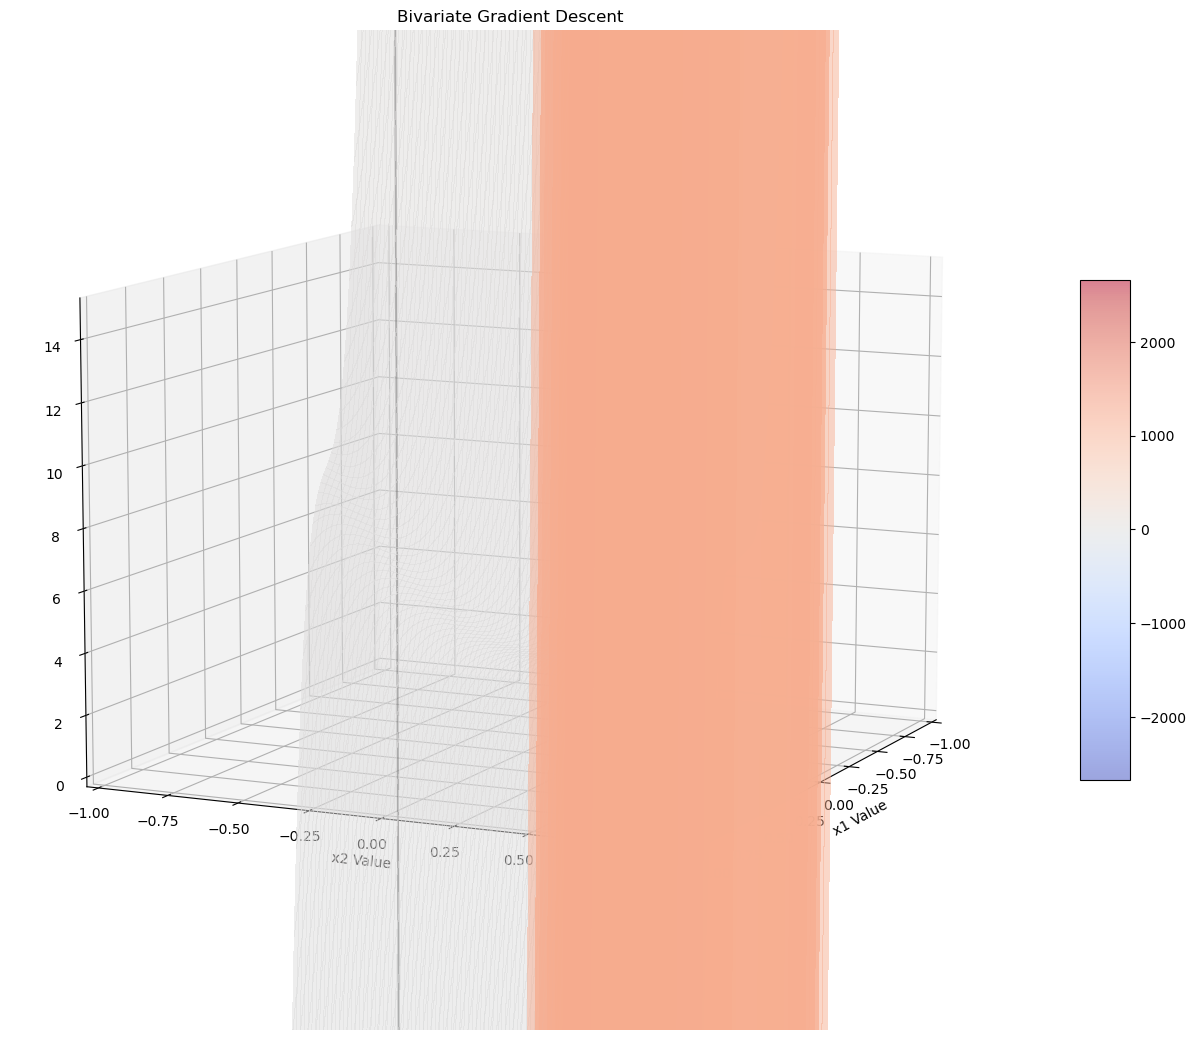

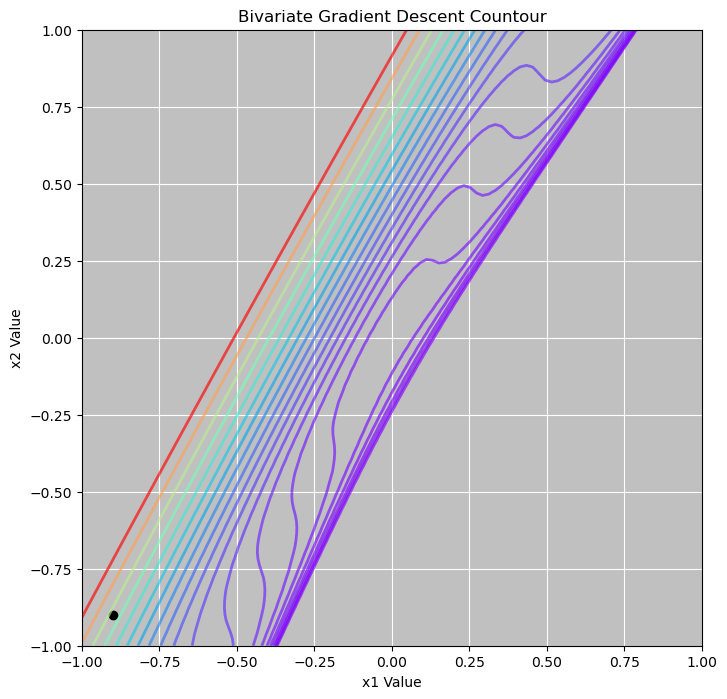

In [41]:
plot = mvGD.plot()

In [34]:
import os
os.system('jupyter nbconvert --to html HW03-Optimization-theory-and-gradient-descent - Copy.ipynb')

0